<a href="https://colab.research.google.com/github/mon-ika349/fluffy-octo-succotash/blob/main/Copy_of_Level3MonikaSharma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Level3Task1 Restaurant reviews**
Analyze the text reviews to identify the most common positive and negative keywords🙅.

In [ ]:
import os
print(os.listdir())

['.config', 'Dataset .csv', 'sample_data']


In [ ]:
df = pd.read_csv("Dataset .csv")
display(df.head())
display(df.info())

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

None

In [ ]:
display(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import string
from nltk.tokenize import word_tokenize

# Handle missing values in 'Rating text'
df['Rating text'] = df['Rating text'].fillna('')

# Convert text to lowercase
df['Rating text'] = df['Rating text'].str.lower()

# Remove punctuation
df['Rating text'] = df['Rating text'].str.translate(str.maketrans('', '', string.punctuation))

# Tokenize the text
df['Rating_text_tokens'] = df['Rating text'].apply(word_tokenize)

display(df[['Rating text', 'Rating_text_tokens']].head())

,Rating text,Rating_text_tokens
0,excellent,[excellent]
1,excellent,[excellent]
2,very good,"[very, good]"
3,excellent,[excellent]
4,excellent,[excellent]


In [ ]:
# Define thresholds for positive and negative reviews
positive_threshold = 4.0
negative_threshold = 2.5

# Create dataframes for positive and negative reviews
positive_reviews_df = df[df['Aggregate rating'] >= positive_threshold].copy()
negative_reviews_df = df[df['Aggregate rating'] <= negative_threshold].copy()

# Display the first few rows and the shape of both dataframes
print("Positive Reviews:")
display(positive_reviews_df.head())
print("\nShape of Positive Reviews DataFrame:", positive_reviews_df.shape)

print("\nNegative Reviews:")
display(negative_reviews_df.head())
print("\nShape of Negative Reviews DataFrame:", negative_reviews_df.shape)

Positive Reviews:


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Rating_text_tokens
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,excellent,314,[excellent]
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,excellent,591,[excellent]
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,very good,270,"[very, good]"
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,excellent,365,[excellent]
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,excellent,229,[excellent]



Shape of Positive Reviews DataFrame: (1380, 22)

Negative Reviews:


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Rating_text_tokens
30,6600060,Sandubas Caf��,30,Bras�_lia,"Edif�_cio Jos�� Severo, SCS 6, Bloco A, Loja 9...",Asa Sul,"Asa Sul, Bras�_lia",-47.890167,-15.797000,"Brazilian, Cafe",...,No,No,No,No,1,0.0,White,not rated,2,"[not, rated]"
58,7305048,Quiosque Chopp Brahma,30,Rio de Janeiro,"Madureira Shopping - Loja 289/290, Piso 2, Est...",Madureira,"Madureira, Rio de Janeiro",-43.341164,-22.870413,"Bar Food, Brazilian",...,No,No,No,No,3,0.0,White,not rated,1,"[not, rated]"
69,6710645,Cantinho da Gula,30,S��o Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, S��o P...",Itaim Bibi,"Itaim Bibi, S��o Paulo",-46.675667,-23.581000,Brazilian,...,No,No,No,No,2,0.0,White,not rated,0,"[not, rated]"
77,6701419,Divino Fog��o,30,S��o Paulo,"Shopping Metr�� Santa Cruz - Piso L2, Rua Domi...","Shopping Metr�� Santa Cruz, Vila Mariana","Shopping Metr�� Santa Cruz, Vila Mariana, S��o...",-46.637167,-23.599500,"Brazilian, Mineira",...,No,No,No,No,3,0.0,White,not rated,2,"[not, rated]"
78,6703956,Super Grill,30,S��o Paulo,"Shopping Morumbi - Piso Lazer, Avenida Roque P...","Shopping Morumbi, Santo Amaro","Shopping Morumbi, Santo Amaro, S��o Paulo",-46.698574,-23.622925,Brazilian,...,No,No,No,No,2,0.0,White,not rated,2,"[not, rated]"



Shape of Negative Reviews DataFrame: (2444, 22)


In [ ]:
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')


stop_words = set(stopwords.words('english'))

# Function to get most common words
def get_most_common_words(dataframe, column, num_words=10):
    all_words = [word for tokens in dataframe[column] for word in tokens if word not in stop_words]
    word_counts = Counter(all_words)
    return word_counts.most_common(num_words)

# Get most common positive keywords
positive_keywords = get_most_common_words(positive_reviews_df, 'Rating_text_tokens')

# Get most common negative keywords
negative_keywords = get_most_common_words(negative_reviews_df, 'Rating_text_tokens')

print("Most common positive keywords:", positive_keywords)
print("\nMost common negative keywords:", negative_keywords)

Most common positive keywords: [('good', 1079), ('excellent', 301)]

Most common negative keywords: [('rated', 2148), ('poor', 186), ('average', 110)]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print("Most Common Positive Keywords:")
for word, count in positive_keywords:
    print(f"- {word}: {count}")

print("\nMost Common Negative Keywords:")
for word, count in negative_keywords:
    print(f"- {word}: {count}")

Most Common Positive Keywords:
- good: 1079
- excellent: 301

Most Common Negative Keywords:
- rated: 2148
- poor: 186
- average: 110


In [ ]:
print("Summary of Findings:")
print("Based on the analysis of the 'Rating text' column:")
print("\nMost Common Positive Keywords:")
for word, count in positive_keywords:
    print(f"- {word}: {count}")

print("\nMost Common Negative Keywords:")
for word, count in negative_keywords:
    print(f"- {word}: {count}")

print("\nThese keywords provide insights into the general sentiment expressed in the ratings.")

Summary of Findings:
Based on the analysis of the 'Rating text' column:

Most Common Positive Keywords:
- good: 1079
- excellent: 301

Most Common Negative Keywords:
- rated: 2148
- poor: 186
- average: 110

These keywords provide insights into the general sentiment expressed in the ratings.


# Task
Analyze the text reviews  to calculate the average review length and explore the relationship between review length and rating.

In [ ]:
df['review_length'] = df['Rating text'].apply(lambda x: len(x.split()))
display(df[['Rating text', 'review_length']].head())

,Rating text,review_length
0,excellent,1
1,excellent,1
2,very good,2
3,excellent,1
4,excellent,1


In [ ]:
average_review_length = df['review_length'].mean()
print(f"The average review length is: {average_review_length:.2f} words")

The average review length is: 1.34 words


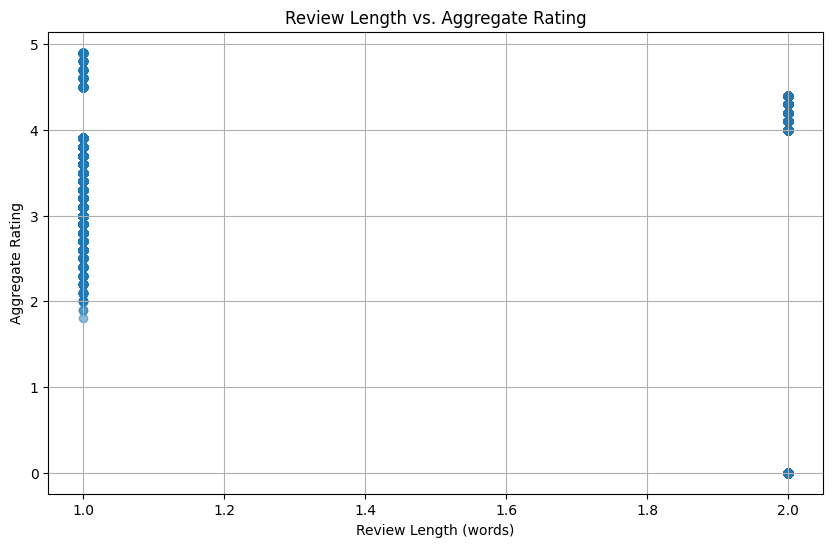

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['review_length'], df['Aggregate rating'], alpha=0.5)
plt.xlabel("Review Length (words)")
plt.ylabel("Aggregate Rating")
plt.title("Review Length vs. Aggregate Rating")
plt.grid(True)
plt.show()

## Calculate Review Lengths

### Subtask:
Create a new column in the DataFrame that stores the length of each review in the 'Rating text' column.

**Reasoning**:
Add a new column `review_length` to the dataframe by applying a lambda function to the 'Rating text' column that splits the text into words and calculates the length.

In [ ]:
df['review_length'] = df['Rating text'].apply(lambda x: len(x.split()))
display(df[['Rating text', 'review_length']].head())

,Rating text,review_length
0,excellent,1
1,excellent,1
2,very good,2
3,excellent,1
4,excellent,1


## Calculate Average Review Length

### Subtask:
Calculate the average length of all the reviews.

**Reasoning**:
Calculate the mean of the `review_length` column to find the average review length.

In [ ]:
average_review_length = df['review_length'].mean()
print(f"The average review length is: {average_review_length:.2f} words")

The average review length is: 1.34 words


## Analyze Relationship between Review Length and Rating

### Subtask:
Explore the relationship between the review length and the 'Aggregate rating' by visualizing or statistically testing the relationship.

**Reasoning**:
Create a scatter plot using matplotlib to visualize the relationship between review length and aggregate rating.

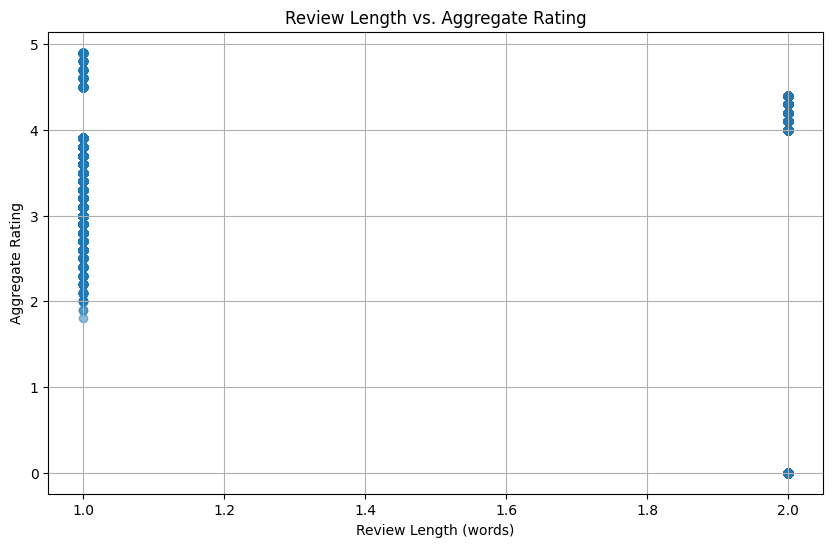

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['review_length'], df['Aggregate rating'], alpha=0.5)
plt.xlabel("Review Length (words)")
plt.ylabel("Aggregate Rating")
plt.title("Review Length vs. Aggregate Rating")
plt.grid(True)
plt.show()

# **Task2 Votes analysis**
Analyze the  dataset to identify the restaurants with the highest 🔟 and lowest number of votes and determine if there is a correlation between the number of votes and the aggregate rating of a restaurant.

## Identify restaurants with highest and lowest votes

### Subtask:
Find the restaurants with the maximum and minimum number of votes.


**Reasoning**:
Identify and display the restaurants with the maximum and minimum number of votes.



In [ ]:
import pandas as pd

df = pd.read_csv("Dataset .csv")

most_voted_restaurant = df.loc[df['Votes'].idxmax()]
least_voted_restaurant = df.loc[df['Votes'].idxmin()]

print("Restaurant with the highest number of votes:")
display(most_voted_restaurant[['Restaurant Name', 'Votes', 'Aggregate rating']])

print("\nRestaurant with the lowest number of votes:")
display(least_voted_restaurant[['Restaurant Name', 'Votes', 'Aggregate rating']])

Restaurant with the highest number of votes:


,728
Restaurant Name,Toit
Votes,10934
Aggregate rating,4.8



Restaurant with the lowest number of votes:


,69
Restaurant Name,Cantinho da Gula
Votes,0
Aggregate rating,0.0


## Analyze correlation between votes and rating

### Subtask:
Calculate and visualize the correlation between the 'Votes' column and the 'Aggregate rating' column.


**Reasoning**:
Calculate and visualize the correlation between the 'Votes' and 'Aggregate rating' columns.



The correlation coefficient between Votes and Aggregate Rating is: 0.31
Interpretation: Moderate positive correlation.


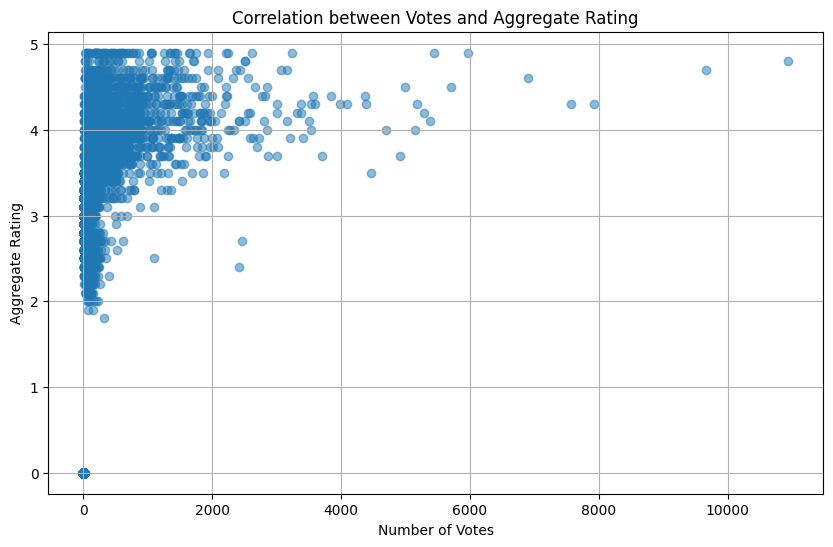

In [ ]:
import matplotlib.pyplot as plt

correlation = df['Votes'].corr(df['Aggregate rating'])
print(f"The correlation coefficient between Votes and Aggregate Rating is: {correlation:.2f}")

if correlation > 0.7:
    print("Interpretation: Strong positive correlation.")
elif correlation > 0.3:
    print("Interpretation: Moderate positive correlation.")
elif correlation > 0:
    print("Interpretation: Weak positive correlation.")
elif correlation < -0.7:
    print("Interpretation: Strong negative correlation.")
elif correlation < -0.3:
    print("Interpretation: Moderate negative correlation.")
elif correlation < 0:
    print("Interpretation: Weak negative correlation.")
else:
    print("Interpretation: Very weak or no correlation.")


plt.figure(figsize=(10, 6))
plt.scatter(df['Votes'], df['Aggregate rating'], alpha=0.5)
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.title("Correlation between Votes and Aggregate Rating")
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The restaurant with the highest number of votes is "Toit" with 10934 votes and an aggregate rating of 4.8.
*   The restaurant with the lowest number of votes is "Cantinho da Gula" with 0 votes and an aggregate rating of 0.0.
*   The correlation coefficient between 'Votes' and 'Aggregate rating' is approximately 0.31, indicating a moderate positive correlation.



# **Task3 Online delivery vs Table booking**
Analyze if there is a relationship between the price range and the availability of online delivery 🚐 and table booking 🈯  and determine if higher-priced restaurants are more likely to offer these services .

## Analyze relationship between price range and online delivery

### Subtask:
Group the data by price range and calculate the proportion of restaurants that offer online delivery in each price range.


**Reasoning**:
Group the dataframe by price range and calculate the proportion of restaurants offering online delivery.



In [ ]:
online_delivery_proportion = df.groupby('Price range')['Has Online delivery'].apply(lambda x: (x == 'Yes').mean())
display(online_delivery_proportion)

,Has Online delivery
Price range,
1,0.157741
2,0.413106
3,0.291903
4,0.090444


## Analyze relationship between price range and table booking

### Subtask:
Group the data by price range and calculate the proportion of restaurants that offer table booking in each price range.


**Reasoning**:
Group the DataFrame by 'Price range' and calculate the proportion of restaurants with table booking for each price range.



In [ ]:
table_booking_proportion = df.groupby('Price range')['Has Table booking'].apply(lambda x: (x == 'Yes').mean())
display(table_booking_proportion)

,Has Table booking
Price range,
1,0.000225
2,0.076775
3,0.457386
4,0.467577


## Compare proportions across price ranges

### Subtask:
Compare the proportions of restaurants offering online delivery and table booking across different price ranges to determine if higher-priced restaurants are more likely to offer these services.


**Reasoning**:
Print the calculated proportions for online delivery and table booking to compare them across different price ranges.



In [ ]:
print("Proportion of restaurants offering Online Delivery by Price Range:")
print(online_delivery_proportion)

print("\nProportion of restaurants offering Table Booking by Price Range:")
print(table_booking_proportion)

Proportion of restaurants offering Online Delivery by Price Range:
Price range
1    0.157741
2    0.413106
3    0.291903
4    0.090444
Name: Has Online delivery, dtype: float64

Proportion of restaurants offering Table Booking by Price Range:
Price range
1    0.000225
2    0.076775
3    0.457386
4    0.467577
Name: Has Table booking, dtype: float64


## Visualize the relationships

### Subtask:
Visualize the relationship between price range and the availability of online delivery and table booking using appropriate plots.


**Reasoning**:
Create bar plots to visualize the proportion of restaurants offering online delivery and table booking for each price range.



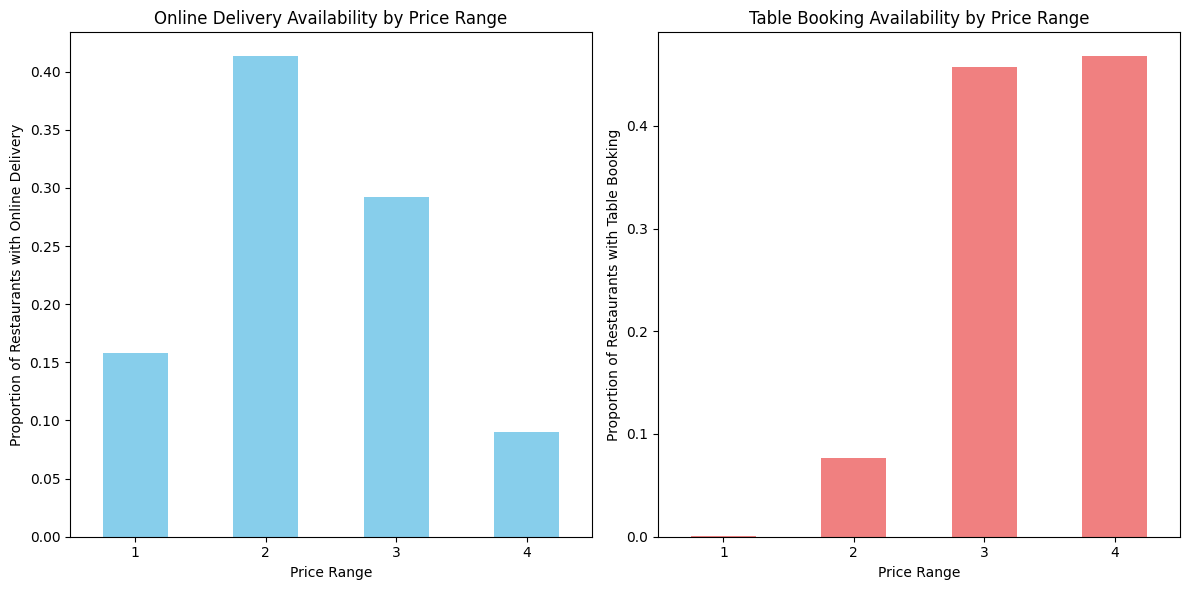

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
online_delivery_proportion.plot(kind='bar', color='skyblue')
plt.xlabel("Price Range")
plt.ylabel("Proportion of Restaurants with Online Delivery")
plt.title("Online Delivery Availability by Price Range")
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
table_booking_proportion.plot(kind='bar', color='lightcoral')
plt.xlabel("Price Range")
plt.ylabel("Proportion of Restaurants with Table Booking")
plt.title("Table Booking Availability by Price Range")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The proportion of restaurants offering online delivery is highest in price range 2 (approximately 41.3%), followed by price range 3 (approximately 29.2%), price range 1 (approximately 15.8%), and price range 4 (approximately 9.0%). Mid-range restaurants are more likely to offer online delivery than higher-priced ones.
*   The proportion of restaurants offering table booking increases significantly with the price range. Price range 1 has a very low proportion (approximately 0.02%), price range 2 has a higher proportion (approximately 7.7%), and price ranges 3 and 4 have the highest and comparable proportions (approximately 45.7% and 46.8%, respectively).


